<a href="https://colab.research.google.com/github/aipalak/CV-DL/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [4]:
data=tf.keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ["T-Shirt", "Trouser", "Pullover", "Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle Boot"]

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train[0]

9

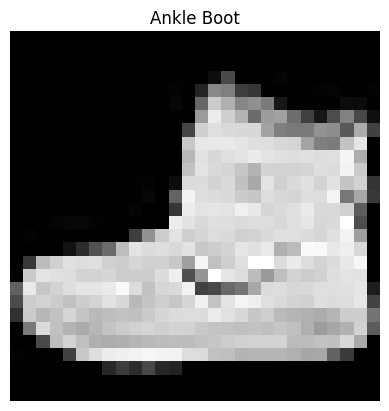

In [11]:
plt.imshow(x_train[0],cmap="gray")
plt.title(class_names[y_train[0]])
plt.axis(False)
plt.show()

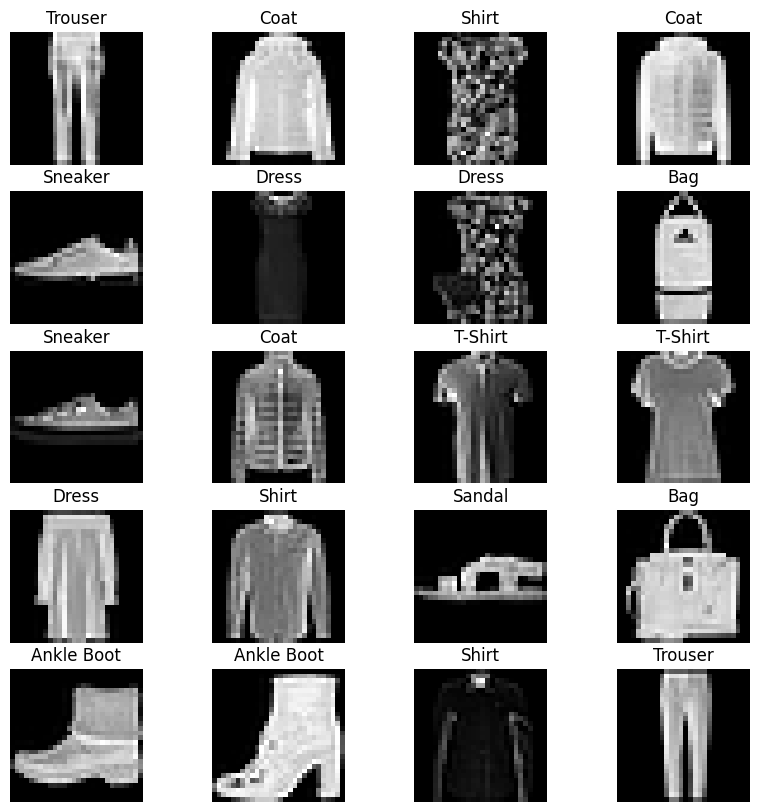

In [13]:
indices=np.random.randint(0,60000,20)
plt.figure(figsize=(10,10))
for i in range(len(indices)):
  plt.subplot(5,4,i+1)
  plt.imshow(x_train[indices[i]],cmap="gray")
  plt.title(class_names[y_train[indices[i]]])
  plt.axis(False)
plt.show()

In [15]:
x_train=x_train/255
y_train=y_train/255

In [16]:
model=tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dense(10)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
losses=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.keras.optimizers.Adam()
model.compile(loss=losses,optimizer=optimizer,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3941e-09 - accuracy: 0.1000 - val_loss: 468832.4688 - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 469919.4375 - val_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 470573.8750 - val_accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 471035.5000 - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 471394.9062 - val_accuracy: 0.1000


In [20]:
model.predict(x_test[100].reshape(1,28,28))

1/1 [==============================] - 0s 93ms/step


array([[ 186444.77, -150370.36, -156919.52, -151710.17, -154891.47,
        -153661.2 , -153673.1 , -152027.42, -152449.42, -154271.17]],
      dtype=float32)

In [21]:
np.argmax(model.predict(x_test[100].reshape(1,28,28)))

1/1 [==============================] - 0s 22ms/step


0

In [22]:
y_test[100]

3

In [23]:
class_names[3]

'Dress'

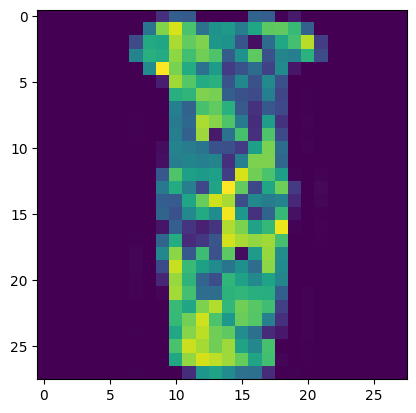

In [25]:
plt.imshow((x_test[100]))